<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Debt_Collection_Analytics_Finance_Sector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few records of the dataset:
    Customer_ID  Age  Income  Outstanding_Debt  Months_Delinquent  \
0            1   56   33343             39110                  6   
1            2   69   43500             17389                 13   
2            3   46   83222             42427                 14   
3            4   32   59375             15043                 20   
4            5   60   39662             29746                  6   

   Credit_Score  Defaulted  
0           829          1  
1           320          1  
2           819          0  
3           399          0  
4           777          0  

Confusion Matrix:
 [[89 16]
 [40  5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.85      0.76       105
           1       0.24      0.11      0.15        45

    accuracy                           0.63       150
   macro avg       0.46      0.48      0.46       150
weighted avg       0.55      0.63      0.58   

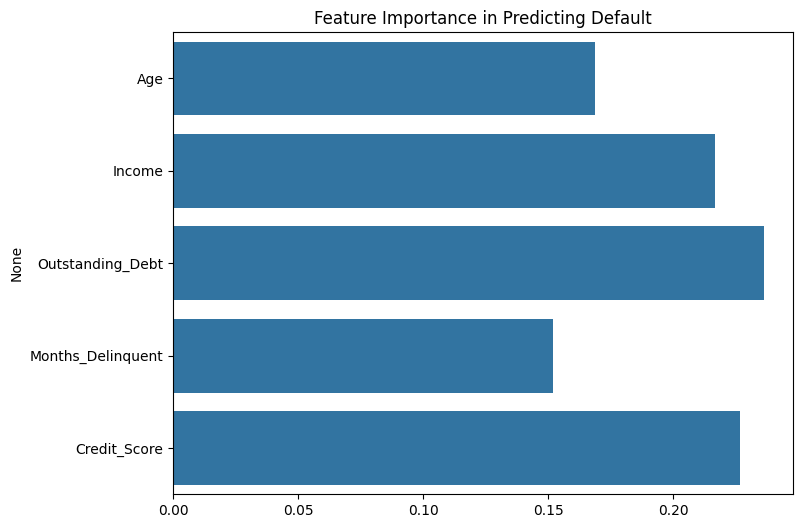


High-risk customer segment:
     Customer_ID  Age  Income  Outstanding_Debt  Months_Delinquent  \
1             2   69   43500             17389                 13   
3             4   32   59375             15043                 20   
8             9   36  115067             47685                  7   
18           19   19  108832             23700                 16   
19           20   41   81293             33043                 13   

    Credit_Score  Defaulted  
1            320          1  
3            399          0  
8            301          0  
18           429          1  
19           444          1  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Mock Data Creation for Customer Debt Collection
np.random.seed(42)

# Generating mock data for customers
num_customers = 500
data = {
    'Customer_ID': np.arange(1, num_customers + 1),
    'Age': np.random.randint(18, 70, num_customers),
    'Income': np.random.randint(30000, 120000, num_customers),
    'Outstanding_Debt': np.random.randint(1000, 50000, num_customers),
    'Months_Delinquent': np.random.randint(0, 24, num_customers),
    'Credit_Score': np.random.randint(300, 850, num_customers),
    'Defaulted': np.random.choice([0, 1], size=num_customers, p=[0.7, 0.3])  # 70% non-default, 30% default
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Data Inspection
print("First few records of the dataset:\n", df.head())

# Split the data into features and target
X = df[['Age', 'Income', 'Outstanding_Debt', 'Months_Delinquent', 'Credit_Score']]
y = df['Defaulted']

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a Random Forest model for prediction
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualizing Feature Importance
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance in Predicting Default')
plt.show()

# Example of optimizing collection strategy:
# Focus on high-risk groups (based on features like credit score and months delinquent)
high_risk_customers = df[(df['Credit_Score'] < 500) & (df['Months_Delinquent'] > 6)]
print("\nHigh-risk customer segment:\n", high_risk_customers.head())

# Potential collection strategy for this group: Implement stricter collection policies or offer repayment plans.
